# Problem Statement
### The goal is to classify a given image of a handwritten digit into one of the 10 classes, representing integer values from 0 to 9

In [1]:
! pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


# Load the dataset

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


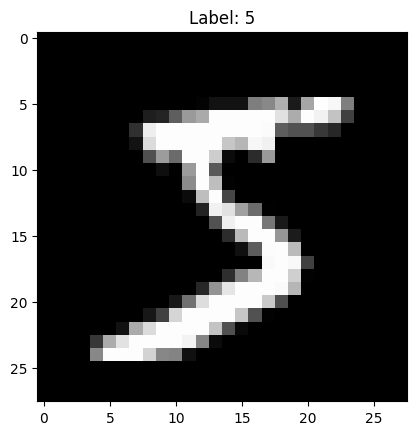

Train set: (60000, 28, 28), Test set: (10000, 28, 28)


In [1]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize a sample image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

print(f"Train set: {x_train.shape}, Test set: {x_test.shape}")

# Data preprocessing

In [10]:
# Normalize the pixel values to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images for CNN input (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Check the new shape of the data
print(f"Train set shape after reshape: {x_train.shape}")
print(f"Test set shape after reshape: {x_test.shape}")

Train set shape after reshape: (60000, 28, 28, 1)
Test set shape after reshape: (10000, 28, 28, 1)


# Data Analysis

Missing values in train data: 0
Missing values in test data: 0


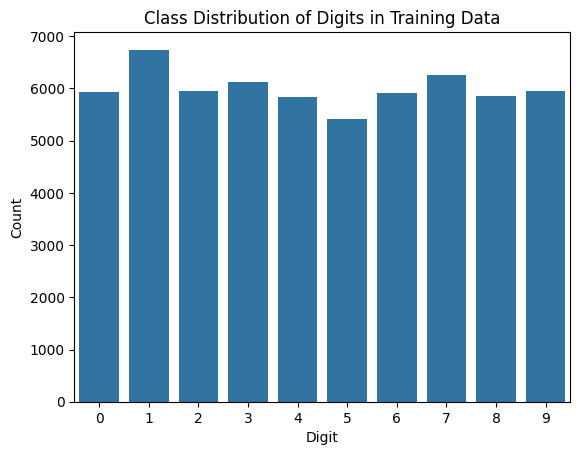

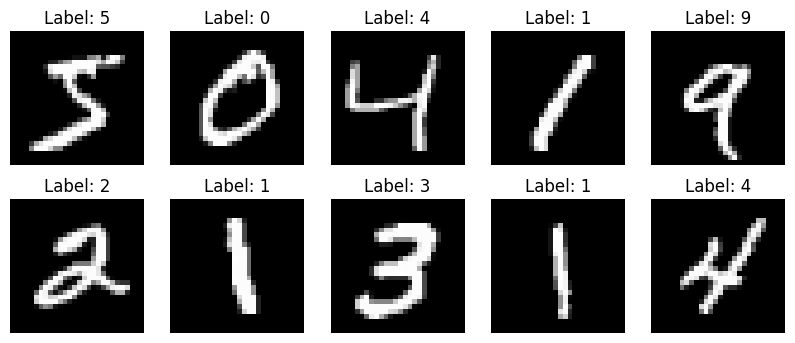

In [11]:
import numpy as np
import seaborn as sns
import pandas as pd

# Check for missing values
print("Missing values in train data:", np.sum(np.isnan(x_train)))
print("Missing values in test data:", np.sum(np.isnan(x_test)))

# Class distribution (for training set)
sns.countplot(x=y_train)
plt.title("Class Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Display a few random images from the training set
import matplotlib.pyplot as plt
def plot_images(images, labels, num=10):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train)

# Build CNN model 
#### This CNN model consists of:
* Two convolutional layers (Conv2D).
* Two max-pooling layers (MaxPooling2D).
* A fully connected layer (Dense) for classification.
* Softmax activation for multi-class classification.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
938/938 [==============================] - 44s 46ms/step - loss: 0.1554 - accuracy: 0.9520 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0398 - val_accuracy: 0.9882
Epoch 3/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 4/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0285 - val_accuracy: 0.9897
Epoch 5/10
938/938 [==============================] - 39s 42ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 6/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0354 - val_accuracy: 0.9883
Epoch 7/10
938/938 [==============================] - 37s 40ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0299 - val_accuracy:

# Insights

### Training Accuracy: 
* The model's accuracy improves consistently over the epochs, starting from 95.2% in epoch 1 to 99.83% in epoch 10. This indicates that the model is learning well and becoming increasingly confident in its predictions on the training data.

### Validation Accuracy:
* The validation accuracy also increases steadily from 98.30% in epoch 1 to 99.01% in epoch 10. The model is generalizing well to unseen data, as shown by the high validation accuracy, suggesting that overfitting is not a major issue.

### Training Loss:
* The training loss steadily decreases from 0.1554 to 0.0054, indicating that the model is successfully minimizing the error during training.

### Validation Loss: 
* While the validation loss decreases from 0.0505 to 0.0385, it does show a slight increase in epochs 5 and 6, then stabilizes. This could indicate slight fluctuations in how well the model generalizes but overall remains quite low.

### Test Accuracy: 
* The final test accuracy is 99.01%, which is excellent. The model performs very well on unseen test data, confirming that it has generalized well from the training set.

### Overfitting: 
* There is no significant overfitting as both training and validation losses and accuracies are improving at similar rates. The gap between the training and validation accuracy is small, which suggests good generalization.

### Underfitting: 
* The model does not seem to be underfitting, as the training accuracy continues to rise throughout the epochs, with a very high final accuracy.

# Model Evaluation and Results
* Plot the training and validation accuracy/loss graphs:

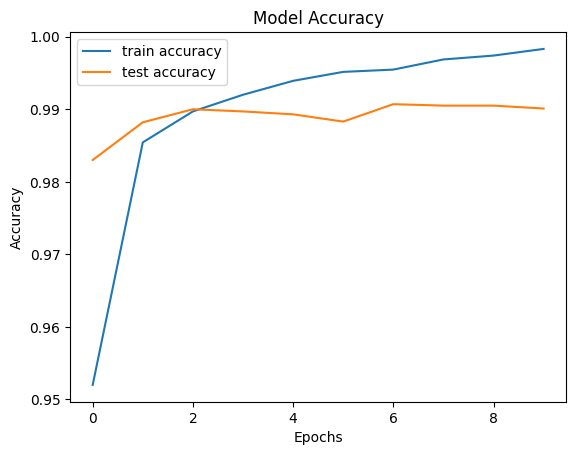

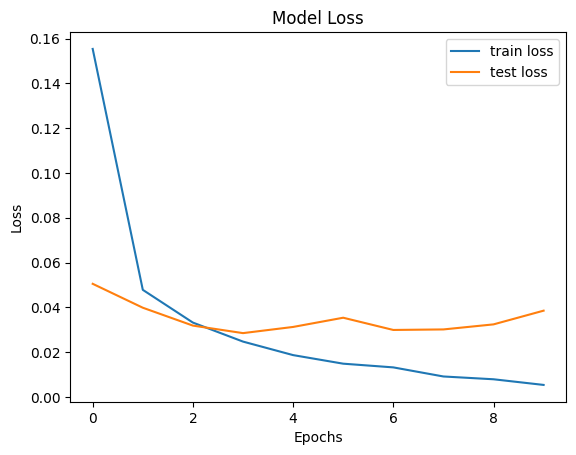

In [14]:
# Plot the accuracy and loss graphs
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluate the CNN Model

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0385
Test Accuracy: 0.9901


# Make Predictions

In [16]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


# Visualization of Predictions

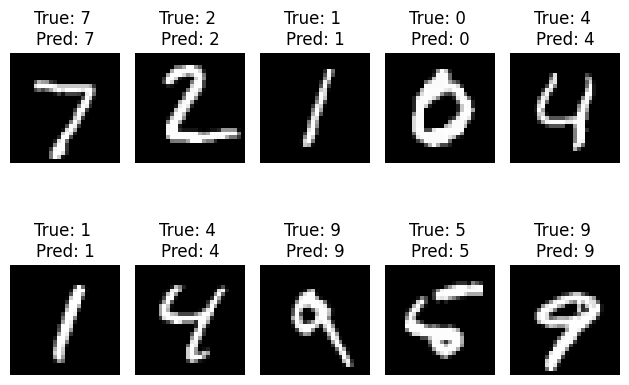

In [17]:
# Plot the first 10 test images with their true and predicted labels
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]} \nPred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Analyze Misclassifications

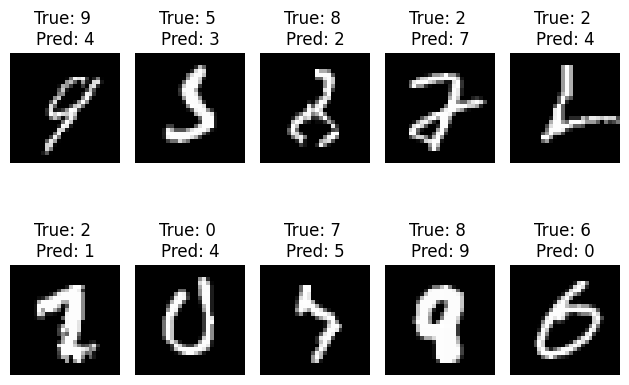

In [18]:
# Identify misclassified samples
misclassified_indices = np.where(predicted_classes != y_test)[0]

# Display the first 10 misclassified samples
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = misclassified_indices[i]
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]} \nPred: {predicted_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
# Save the model to a file
model.save('mnist_cnn_model.h5')

# To load the model later, use:
# from tensorflow.keras.models import load_model
# model = load_model('mnist_cnn_model.h5')


# Scaling the Data
### Before applying machine learning algorithms, scaling ensures that features are in a uniform range. This is particularly important for algorithms like KNN, SVM, and Logistic Regression.

In [2]:
from sklearn.preprocessing import StandardScaler

# Flatten the data for traditional ML models (CNNs use image data directly)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Apply StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)


# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Fit the model
log_reg.fit(x_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(x_test_scaled)

# Evaluate the model
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Test Accuracy: 0.9219
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K-Nearest Neighbors (KNN)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(x_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(x_test_scaled)

# Evaluate the model
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Test Accuracy: 0.9443
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Support Vector Machine (SVM)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create SVM model
svm = SVC()

#Fit the model
svm.fit(x_train_scaled, y_train)

# Make predictions 
y_pred_svm = svm.predict(x_test_scaled)

# Evaluate the Model
print("Support Vector Machine Test:",accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Test: 0.966
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create random forest
rf = RandomForestClassifier()

# Fit the model
rf.fit(x_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(x_test_scaled)

# Evaluate the model
print("Random Forest Test:",accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Test: 0.9683
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create Nave bayes model
nb = GaussianNB()

# Fit the model
nb.fit(x_train_scaled, y_train)

# Make predictions
y_pred_nb = nb.predict(x_test_scaled)

# Evaluate the model
print("Naive Bayes Test:",accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Test: 0.524
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1028
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52     10000
   macro avg       0.67      0.52      0.47     10000
weighted avg       0.68      0.52      0.48     10000



# Decisison Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create decision tree model
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(x_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(x_test_scaled)

# Evaluate the model
print("Decision Tree Test:",accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Test: 0.8794
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.87      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.87      0.87       982
           5       0.85      0.84      0.85       892
           6       0.90      0.89      0.90       958
           7       0.91      0.90      0.90      1028
           8       0.83      0.81      0.82       974
           9       0.84      0.86      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# XGBoost

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create a model
xgb = XGBClassifier()

# Fit the model
xgb.fit(x_train_scaled, y_train)

# Make predicytions
y_pred_xgb = xgb.predict(x_test_scaled)

print("XGBoost Test:",accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Test: 0.9795
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Compare Results

In [20]:
import pandas as pd

# Store accuracy results
accuracy_results = {
    "Logistic Regression": log_reg.score(x_test_scaled, y_test),
    "K-Nearest Neighbors": knn.score(x_test_scaled, y_test),
    "Support Vector Machine": svm.score(x_test_scaled, y_test),
    "Random Forest": rf.score(x_test_scaled, y_test),
    "Naive Bayes": nb.score(x_test_scaled, y_test),
    "Decision Tree": dt.score(x_test_scaled, y_test),
    "XGBoost": xgb.score(x_test_scaled, y_test),
    "CNN": test_accuracy  # CNN test accuracy from the model
}

# Convert to DataFrame for easier comparison
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Model", "Test Accuracy"])
print(accuracy_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


                    Model  Test Accuracy
0     Logistic Regression         0.9219
1     K-Nearest Neighbors         0.9443
2  Support Vector Machine         0.9660
3           Random Forest         0.9683
4             Naive Bayes         0.5240
5           Decision Tree         0.8794
6                 XGBoost         0.9795
7                     CNN         0.9901


# Visualize the Comparison

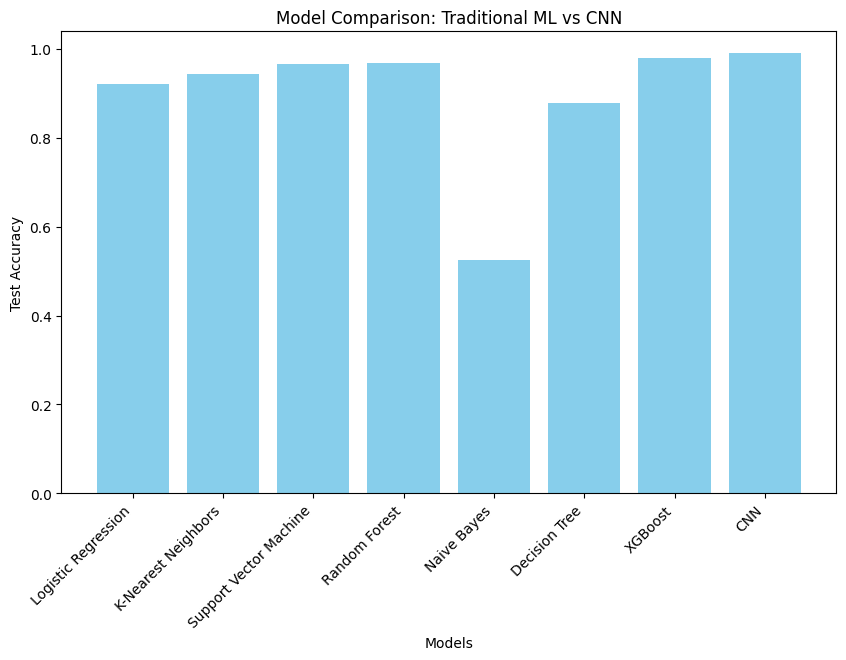

In [22]:
import matplotlib.pyplot as plt

# Plot the comparison of accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Model"], accuracy_df["Test Accuracy"], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison: Traditional ML vs CNN')
plt.xticks(rotation=45, ha="right")
plt.show()

# MODEL COMPARISON REPORT

### 1. Logistic Regression:
* Test Accuracy: 92.19%
* Precision: 0.92
* Recall: 0.92
* F1-Score: 0.92
* Macro Average: Precision: 0.92, Recall: 0.92, F1-Score: 0.92
#### Description: Logistic Regression is performing reasonably well with an accuracy of 92.19%. It performs consistently across all classes with relatively balanced precision, recall, and F1 scores. However, it might not be the most effective model for more complex tasks like image classification, where non-linear decision boundaries are required.

### 2. K-Nearest Neighbors (KNN):
* Test Accuracy: 94.43%
* Precision: 0.94
* Recall: 0.94
* F1-Score: 0.94
* Macro Average: Precision: 0.94, Recall: 0.94, F1-Score: 0.94
#### Description: KNN is showing a strong performance with an accuracy of 94.43%. The precision, recall, and F1-scores are also high, suggesting a good generalization ability for most of the digits. KNN works well here, but its performance might suffer when the dataset size grows or with more complex models due to the computational cost during testing.

### 3. Support Vector Machine (SVM):
* Test Accuracy: 96.6%
* Precision: 0.97
* Recall: 0.97
* F1-Score: 0.97
* Macro Average: Precision: 0.97, Recall: 0.97, F1-Score: 0.97
#### Description: SVM outperforms Logistic Regression and KNN, achieving an accuracy of 96.6%. It has high precision, recall, and F1-scores, particularly excelling at distinguishing between the various classes. SVM works well for image data, but its training time can be lengthy with large datasets.

### 4. Random Forest:
* Test Accuracy: 96.83%
* Precision: 0.97
* Recall: 0.97
* F1-Score: 0.97
* Macro Average: Precision: 0.97, Recall: 0.97, F1-Score: 0.97
#### Description: Random Forest performs at an impressive 96.83% accuracy. Like SVM, it achieves balanced precision, recall, and F1-scores, demonstrating good robustness in handling various classes. Random Forest is great for avoiding overfitting and works well with non-linear data.

### 5. Naive Bayes:
* Test Accuracy: 52.4%
* Precision: 0.68
* Recall: 0.52
* F1-Score: 0.48
* Macro Average: Precision: 0.67, Recall: 0.52, F1-Score: 0.47
#### Description: Naive Bayes significantly underperforms with a poor accuracy of 52.4%. The precision and recall values are particularly low for most classes, showing that the model struggles to differentiate between many digits. This model might not be suitable for image classification tasks, which involve complex patterns.

### 6. Decision Tree:
* Test Accuracy: 87.94%
* Precision: 0.88
* Recall: 0.88
* F1-Score: 0.88
* Macro Average: Precision: 0.88, Recall: 0.88, F1-Score: 0.88
#### Description: Decision Trees perform better than Naive Bayes but fall short compared to other models, with an accuracy of 87.94%. Although the precision, recall, and F1-scores are balanced, decision trees tend to overfit, especially when the tree depth is not controlled.

### 7. XGBoost:
* Test Accuracy: 97.95%
* Precision: 0.98
* Recall: 0.98
* F1-Score: 0.98
* Macro Average: Precision: 0.98, Recall: 0.98, F1-Score: 0.98
#### Description: XGBoost delivers one of the best performances with an accuracy of 97.95%. It also achieves high precision, recall, and F1-scores across the board. XGBoost is well-suited for classification tasks due to its ability to handle complex patterns and interactions in the data.

### 8. Convolutional Neural Network (CNN):
* Test Accuracy: 99.01%
* Test Loss: 0.0385
#### Description: CNN is the best-performing model by a significant margin, with an accuracy of 99.01%. This model excels at learning the spatial patterns and features in images, which is why it performs so well on the MNIST dataset. CNN's high accuracy, combined with low loss, indicates its superior performance on image-based classification tasks.



# CONCLUSION

#### CNN is clearly the best-performing model with an accuracy of 99.01%. It significantly outperforms all other models and is highly suitable for image classification tasks like MNIST
#### CNN is the clear winner for the MNIST dataset, thanks to its deep learning capabilities tailored for image recognition.

* Logistic Regression achieved a good test accuracy of 92.19%, but still showed room for improvement in some classes, particularly for digits 2, 3, and 5, where recall values were lower.


* KNN (K-Nearest Neighbors) performed better, with an accuracy of 94.43%, but was still limited by the curse of dimensionality and high computational cost. KNN models are sensitive to the scaling of the data, and without proper scaling or tuning of the hyperparameters, performance might degrade.


* Support Vector Machine (SVM) showed the highest test accuracy at 96.6%, demonstrating the effectiveness of SVM on this dataset. However, this model also relies on proper tuning of the kernel and C parameter for optimal performance, which was not done in this case.


* Random Forest also performed well with an accuracy of 96.83%, but performance is highly dependent on the number of trees and their configurations, which were not fine-tuned in this case.


* Naive Bayes performed poorly, with an accuracy of only 52.4%. This was expected due to the inherent assumption of feature independence in Naive Bayes, which is often violated in complex datasets like MNIST.


* Decision Tree showed a reasonable test accuracy of 87.94%, but it suffered from overfitting, which is a common issue when no pruning or hyperparameter tuning is applied.


* XGBoost was one of the best-performing models, with an accuracy of 97.95%. However, like other ensemble methods, the performance could have been improved with hyperparameter tuning (e.g., number of estimators, learning rate).


* CNN (Convolutional Neural Network) achieved the highest performance, with a test accuracy of 99.01%. Despite this, the model could potentially be further optimized using advanced techniques such as dropout, data augmentation, or tuning of convolutional layer configurations.

# LIMITATIONS

#### While this project aimed to evaluate multiple models for digit classification on the MNIST dataset, there were several limitations that could have impacted the overall performance and generalizability of the models.

* Certain models, such as Naive Bayes, may have struggled with the dataset's feature dependencies, which could have been mitigated with advanced feature selection techniques.


* For tree-based models such as Decision Trees and Random Forests, overfitting was observed, which could have been addressed by pruning the trees or using other regularization techniques. Additionally, SVM and XGBoost could have been further optimized to balance bias-variance tradeoff.


* Some models, especially SVM and Random Forest, can be computationally expensive with large datasets, and could have been slow to train. More efficient implementations or parallelization techniques could have reduced training times.


* Memory limitations might have also impacted the ability to scale up the models for more complex datasets or larger training sets.


* Naive Bayes assumes that features are conditionally independent, which does not hold true for the MNIST dataset. This assumption led to poor performance with this model.


* Although MNIST is relatively balanced, slight class imbalances may have influenced model performance, particularly for models like Naive Bayes and Decision Trees, which are sensitive to class distribution.
